In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats as stats
from math import log
import graphviz
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [2]:
df1=pd.read_csv('accidents_2005_to_2007.csv',dtype='unicode')
df2=pd.read_csv('accidents_2009_to_2011.csv',dtype='unicode')
#df3=pd.read_csv('accidents_2012_to_2014.csv',dtype='unicode')
df2

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200901BS70001,524910,180800,-0.201349,51.512273,1,2,2,1,01/01/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002882,2009
1,200901BS70002,525050,181040,-0.199248,51.514399,1,2,2,11,05/01/2009,...,Zebra crossing,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002886,2009
2,200901BS70003,526490,177990,-0.179599,51.486668,1,3,2,1,04/01/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002912,2009
3,200901BS70004,524800,180300,-0.20311,51.507804,1,2,2,1,05/01/2009,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Other,Frost/Ice,None,None,1,Yes,E01002871,2009
4,200901BS70005,526930,177490,-0.173445,51.482076,1,2,2,1,06/01/2009,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002840,2009
5,200901BS70006,526060,178730,-0.185525,51.493415,1,3,2,3,01/01/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002839,2009
6,200901BS70007,526580,177270,-0.178561,51.480177,1,2,2,1,08/01/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002841,2009
7,200901BS70008,526550,178580,-0.178524,51.491957,1,3,1,1,02/01/2009,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002835,2009
8,200901BS70009,527310,179100,-0.167395,51.49646,1,3,1,2,07/01/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002819,2009
9,200901BS70010,526250,177370,-0.183275,51.48115,1,3,1,1,10/01/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Other,Wet/Damp,Roadworks,None,1,Yes,E01002843,2009


In [51]:
set(df['Light_Conditions'])

{'Darkeness: No street lighting',
 'Darkness: Street lighting unknown',
 'Darkness: Street lights present and lit',
 'Darkness: Street lights present but unlit',
 'Daylight: Street light present'}

In [3]:
df1.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [4]:
dff=df1[['Accident_Severity','Number_of_Vehicles','Number_of_Casualties',
        'Date','Day_of_Week','Light_Conditions','Time','Road_Type','Speed_limit',
        'Weather_Conditions','Road_Surface_Conditions',
       'Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Urban_or_Rural_Area']]
dff=dff.dropna(axis=0,how='any')
dff['Accident_Severity']=dff['Accident_Severity'].astype('int')
dff['Number_of_Vehicles']=dff['Number_of_Vehicles'].astype('int')
dff['Number_of_Casualties']=dff['Number_of_Casualties'].astype('int')
dff['Day_of_Week']=dff['Day_of_Week'].astype('int')
dff['Speed_limit']=dff['Speed_limit'].astype('int')
dff['Urban_or_Rural_Area']=dff['Urban_or_Rural_Area'].astype('int')
#Binning number of casualities in low med and high
dff['Number_of_Casualties']=pd.cut(dff['Number_of_Casualties'],10,labels=[1,2,3,4,5,6,7,8,9,10]).astype('int')
dff['Time']=dff['Time'].str[:2].astype(int)
len(dff)

569229

In [49]:
len(dff.columns)

14

In [5]:
df=df2[['Accident_Severity','Number_of_Vehicles','Number_of_Casualties',
        'Date','Day_of_Week','Light_Conditions','Time','Road_Type','Speed_limit',
        'Weather_Conditions','Road_Surface_Conditions',
       'Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Urban_or_Rural_Area']]
df=df.dropna(axis=0,how='any')
df['Accident_Severity']=df['Accident_Severity'].astype('int')
df['Number_of_Vehicles']=df['Number_of_Vehicles'].astype('int')
df['Number_of_Casualties']=df['Number_of_Casualties'].astype('int')
df['Day_of_Week']=df['Day_of_Week'].astype('int')
df['Speed_limit']=df['Speed_limit'].astype('int')
df['Urban_or_Rural_Area']=df['Urban_or_Rural_Area'].astype('int')
#Binning number of casualities in low med and high
df['Number_of_Casualties']=pd.cut(df['Number_of_Casualties'],10,labels=[1,2,3,4,5,6,7,8,9,10]).astype('int')
df['Time']=df['Time'].str[:2].astype(int)
len(df)

468760

In [6]:
df_count_road_condition=pd.DataFrame(df['Road_Surface_Conditions'].value_counts())
df_count_road_condition.index.name='Road_Surface_Conditions'
df_count_road_condition.columns=['Count']
df_count_road_condition

,Count
Road_Surface_Conditions,
Dry,325290
Wet/Damp,122013
Frost/Ice,15352
Snow,5578
Flood (Over 3cm of water),527


In [7]:
df_count_road_condition=pd.DataFrame(df['Number_of_Casualties'].value_counts())
df_count_road_condition.index.name='Number_of_Casualties'
df_count_road_condition.columns=['Count']
df_count_road_condition

,Count
Number_of_Casualties,
1,468598
2,137
3,14
5,5
6,3
10,1
8,1
4,1


In [8]:
df_count_light_condition=pd.DataFrame(df['Light_Conditions'].value_counts())
df_count_light_condition.index.name='Light_Conditions'
df_count_light_condition.columns=['Count']
df_count_light_condition

,Count
Light_Conditions,
Daylight: Street light present,346312
Darkness: Street lights present and lit,90663
Darkeness: No street lighting,25339
Darkness: Street lighting unknown,4569
Darkness: Street lights present but unlit,1877


In [9]:
df_count_Day_of_Week=pd.DataFrame(df['Day_of_Week'].value_counts())
df_count_Day_of_Week.index.name='Day_of_Week'
df_count_Day_of_Week.columns=['Count']
df_count_Day_of_Week

,Count
Day_of_Week,
6,76979
4,70641
5,70477
3,70193
2,66717
7,62885
1,50868


In [10]:
df_count_Urban_or_Rural_Area=pd.DataFrame(df['Urban_or_Rural_Area'].value_counts())
df_count_Urban_or_Rural_Area.index.name='Urban_or_Rural_Area'
df_count_Urban_or_Rural_Area.columns=['Count']
df_count_Urban_or_Rural_Area

,Count
Urban_or_Rural_Area,
1,302954
2,165806


In [11]:
pd.pivot_table(df,index=['Road_Surface_Conditions','Light_Conditions'],aggfunc='count',values=['Accident_Severity'])

Accident_Severity
Road_Surface_Conditions   Light_Conditions                                            
Dry                       Darkeness: No street lighting                          10752
                          Darkness: Street lighting unknown                       3127
                          Darkness: Street lights present and lit                50482
                          Darkness: Street lights present but unlit               1022
                          Daylight: Street light present                        259907
Flood (Over 3cm of water) Darkeness: No street lighting                            147
                          Darkness: Street lighting unknown                          9
                          Darkness: Street lights present and lit                   84
                          Darkness: Street lights present but unlit                  5
                          Daylight: Street light present                           282
Frost/Ice                 Darkeness: No street lighting                           2760
                          Darkness: Street lighting unknown                        213
                          Darkness: Street lights present and lit                 3665
                          Darkness: Street lights present but unlit                104
                          Daylight: Street light present                          8610
Snow                      Darkeness: No street lighting                            739
                          Darkness: Street lighting unknown                         92
                          Darkness: Street lights present and lit                 1479
                          Darkness: Street lights present but unlit                 29
                          Daylight: Street light present                          3239
Wet/Damp                  Darkeness: No street lighting                          10941
                          Darkness: Street lighting unknown                       1128
                          Darkness: Street lights present and lit                34953
                          Darkness: Street lights present but unlit                717
                          Daylight: Street light present                         74274

In [12]:
dff_binary=pd.get_dummies(dff,columns=['Weather_Conditions','Road_Type','Road_Surface_Conditions','Light_Conditions','Urban_or_Rural_Area','Pedestrian_Crossing-Physical_Facilities'])

In [13]:
df_binary=pd.get_dummies(df,columns=['Weather_Conditions','Road_Type','Road_Surface_Conditions','Light_Conditions','Urban_or_Rural_Area','Pedestrian_Crossing-Physical_Facilities'])

In [14]:
count=0
for i in df_binary.columns:
    if type(i)==int:
        c,p=stats.normaltest(df_binary[i])
        count+=p
print(count)

0


In [15]:
#Correlation using spearman beacuse not a normal distributed data also since it is nominal and not numerical
df_corr=df_binary.corr(method='spearman')
df_corr

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Speed_limit,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,...,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Urban_or_Rural_Area_1,Urban_or_Rural_Area_2,Pedestrian_Crossing-Physical_Facilities_Central refuge,Pedestrian_Crossing-Physical_Facilities_Footbridge or subway,Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters,Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction,Pedestrian_Crossing-Physical_Facilities_Zebra crossing,Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing
Accident_Severity,1.000000,0.107023,-0.014897,0.002899,-0.006436,-0.071598,-0.004772,-0.027775,-0.002147,0.014151,...,-0.001269,0.042185,0.076004,-0.076004,-0.012811,0.002249,-0.010244,0.018939,0.008413,-0.003116
Number_of_Vehicles,0.107023,1.000000,0.012882,-0.000519,0.009894,0.056748,-0.006833,0.025617,-0.010058,-0.016642,...,-0.007639,0.095134,-0.012761,0.012761,-0.020056,0.006349,0.051741,-0.005727,-0.035552,-0.043596
Number_of_Casualties,-0.014897,0.012882,1.000000,-0.001074,-0.002408,0.011618,-0.000004,-0.002642,0.000275,-0.000052,...,-0.001179,0.002173,-0.009050,0.009050,-0.000840,0.001044,0.003883,-0.002285,-0.001781,-0.002388
Day_of_Week,0.002899,-0.000519,-0.001074,1.000000,0.027796,-0.015304,-0.006022,0.002864,0.002417,-0.004662,...,-0.001068,-0.012932,0.015458,-0.015458,0.002245,0.002877,-0.009331,0.002979,0.003741,0.007482
Time,-0.006436,0.009894,-0.002408,0.027796,1.000000,-0.048506,-0.002105,-0.008845,-0.026578,-0.021349,...,0.015737,-0.312333,0.048196,-0.048196,0.001992,-0.002757,-0.015662,0.013889,0.005034,0.006463
Speed_limit,-0.071598,0.056748,0.011618,-0.015304,-0.048506,1.000000,0.022727,-0.058521,0.047078,0.026141,...,0.002320,-0.020884,-0.677207,0.677207,-0.041989,0.004754,0.229448,-0.138494,-0.110112,-0.124185
Weather_Conditions_Fine with high winds,-0.004772,-0.006833,-0.000004,-0.006022,-0.002105,0.022727,1.000000,-0.226209,-0.008025,-0.017967,...,0.004824,-0.007578,-0.022130,0.022130,0.002757,-0.000274,0.005793,-0.007368,-0.004376,0.000182
Weather_Conditions_Fine without high winds,-0.027775,0.025617,-0.002642,0.002864,-0.008845,-0.058521,-0.226209,1.000000,-0.144946,-0.324525,...,-0.017928,0.143394,0.057060,-0.057060,0.003818,0.002402,-0.027905,0.019035,0.010042,0.015153
Weather_Conditions_Fog or mist,-0.002147,-0.010058,0.000275,0.002417,-0.026578,0.047078,-0.008025,-0.144946,1.000000,-0.011512,...,0.010606,-0.046056,-0.046769,0.046769,-0.004263,-0.000193,0.017995,-0.011523,-0.007521,-0.009103
Weather_Conditions_Other,0.014151,-0.016642,-0.000052,-0.004662,-0.021349,0.026141,-0.017967,-0.324525,-0.011512,1.000000,...,0.010972,-0.056442,-0.031861,0.031861,-0.002530,-0.001265,0.018433,-0.012867,-0.007100,-0.009413


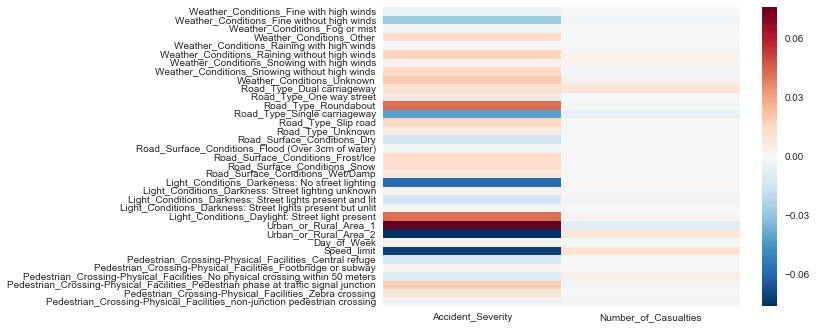

In [16]:
sns.heatmap(df_corr.loc[['Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown', 'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present', 'Urban_or_Rural_Area_1', 'Urban_or_Rural_Area_2','Day_of_Week','Speed_limit',
       'Pedestrian_Crossing-Physical_Facilities_Central refuge',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing'],
                        ['Accident_Severity','Number_of_Casualties']])
plt.show()

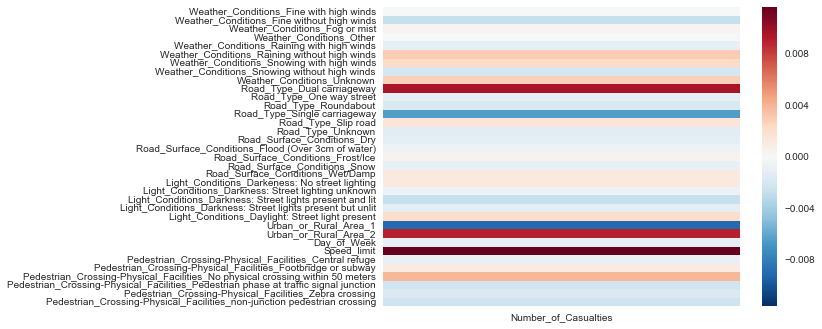

In [17]:
sns.heatmap(df_corr.loc[['Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown', 'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present', 'Urban_or_Rural_Area_1', 'Urban_or_Rural_Area_2','Day_of_Week','Speed_limit',
       'Pedestrian_Crossing-Physical_Facilities_Central refuge',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing'],
                        ['Number_of_Casualties']])
plt.show()

In [18]:
df_corr.columns

Index(['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', 'Time', 'Speed_limit',
       'Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown', 'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp',
       'Light_Conditions_Darkeness: No street lighting',
       '

In [19]:
df_no_of_accidents=pd.DataFrame(index=['Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown', 'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present', 'Urban_or_Rural_Area_1', 'Urban_or_Rural_Area_2',
       'Pedestrian_Crossing-Physical_Facilities_Central refuge',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing'])
li=[]
cnt=-1
for i in df_no_of_accidents.index:
    cnt+=1
    li.append([])
    val=len(df_binary[df_binary[i]==1])
    li[cnt].append(val)
df_no_of_accidents=pd.DataFrame(li,columns=['Number of Accidents'],index=['Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown', 'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present', 'Urban_or_Rural_Area_1', 'Urban_or_Rural_Area_2',
       'Pedestrian_Crossing-Physical_Facilities_Central refuge',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing'])


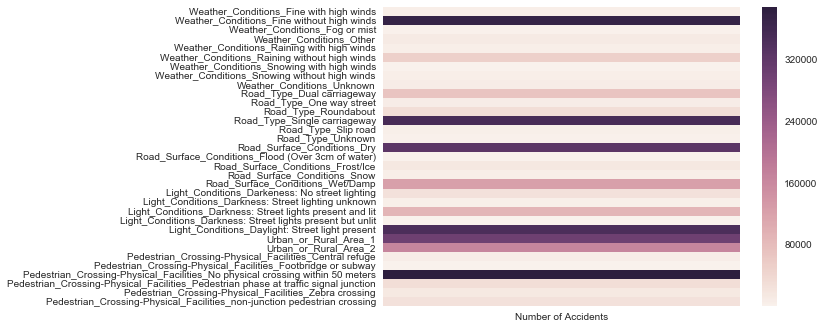

In [20]:
sns.heatmap(df_no_of_accidents)
plt.show()

In [21]:
df_binary_2=pd.get_dummies(df,columns=['Day_of_Week', 'Time', 'Speed_limit'])

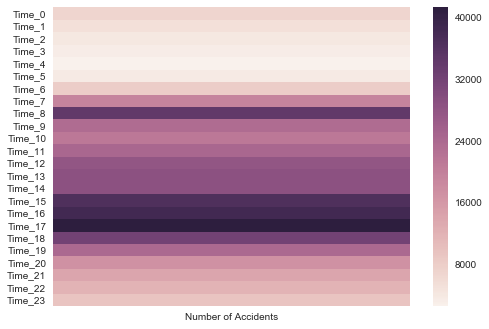

In [22]:
df_no_of_accidents=pd.DataFrame(index=['Time_0', 'Time_1',
       'Time_2', 'Time_3', 'Time_4', 'Time_5', 'Time_6', 'Time_7', 'Time_8',
       'Time_9', 'Time_10', 'Time_11', 'Time_12', 'Time_13', 'Time_14',
       'Time_15', 'Time_16', 'Time_17', 'Time_18', 'Time_19', 'Time_20',
       'Time_21', 'Time_22', 'Time_23'])
li=[]
cnt=-1
for i in df_no_of_accidents.index:
    cnt+=1
    li.append([])
    val=len(df_binary[df_binary_2[i]==1])
    li[cnt].append(val)
df_no_of_accidents=pd.DataFrame(li,columns=['Number of Accidents'],index=[ 'Time_0', 'Time_1',
       'Time_2', 'Time_3', 'Time_4', 'Time_5', 'Time_6', 'Time_7', 'Time_8',
       'Time_9', 'Time_10', 'Time_11', 'Time_12', 'Time_13', 'Time_14',
       'Time_15', 'Time_16', 'Time_17', 'Time_18', 'Time_19', 'Time_20',
       'Time_21', 'Time_22', 'Time_23'])
sns.heatmap(df_no_of_accidents)
plt.show()

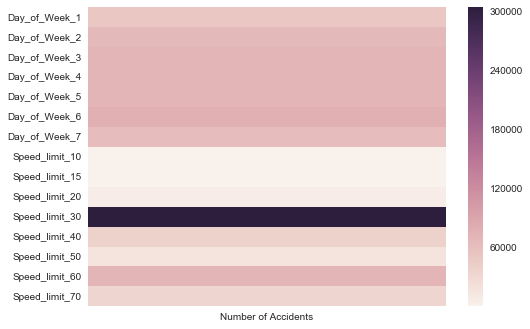

In [23]:
df_no_of_accidents=pd.DataFrame(index=['Day_of_Week_1', 'Day_of_Week_2', 'Day_of_Week_3', 'Day_of_Week_4',
       'Day_of_Week_5', 'Day_of_Week_6', 'Day_of_Week_7','Speed_limit_10', 'Speed_limit_15',
       'Speed_limit_20', 'Speed_limit_30', 'Speed_limit_40', 'Speed_limit_50',
       'Speed_limit_60', 'Speed_limit_70'])
li=[]
cnt=-1
for i in df_no_of_accidents.index:
    cnt+=1
    li.append([])
    val=len(df_binary[df_binary_2[i]==1])
    li[cnt].append(val)
df_no_of_accidents=pd.DataFrame(li,columns=['Number of Accidents'],index=['Day_of_Week_1', 'Day_of_Week_2', 'Day_of_Week_3', 'Day_of_Week_4',
       'Day_of_Week_5', 'Day_of_Week_6', 'Day_of_Week_7', 'Speed_limit_10', 'Speed_limit_15',
       'Speed_limit_20', 'Speed_limit_30', 'Speed_limit_40', 'Speed_limit_50',
       'Speed_limit_60', 'Speed_limit_70'])
sns.heatmap(df_no_of_accidents)
plt.show()

In [24]:
#Correlation and p-value
att1=['Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown', 'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present', 'Urban_or_Rural_Area_1', 'Urban_or_Rural_Area_2','Day_of_Week','Speed_limit',
       'Pedestrian_Crossing-Physical_Facilities_Central refuge',
       'Pedestrian_Crossing-Physical_Facilities_Footbridge or subway',
       'Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters',
       'Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction',
       'Pedestrian_Crossing-Physical_Facilities_Zebra crossing',
       'Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing']
att2=['Accident_Severity','Number_of_Casualties']
li=[]
cnt=-1
for i in att1:
    for j in att2:
        cnt+=1
        li.append([])
        li[cnt].append(i)
        li[cnt].append(j)
        c,p=stats.spearmanr(df_binary[i],df_binary[j])
        li[cnt].append(c)
        li[cnt].append(p)
        if p<0.05:
            li[cnt].append('1')
        else:
            li[cnt].append('0')
df_stat_test=pd.DataFrame(li,columns=['Attribute 1','Attribute 2','Correlation','p-value','Result'])

In [25]:
df_stat_test

,Attribute 1,Attribute 2,Correlation,p-value,Result
0,Weather_Conditions_Fine with high winds,Accident_Severity,-0.004772,1.085465e-03,1
1,Weather_Conditions_Fine with high winds,Number_of_Casualties,-0.000004,9.978144e-01,0
2,Weather_Conditions_Fine without high winds,Accident_Severity,-0.027775,1.168672e-80,1
3,Weather_Conditions_Fine without high winds,Number_of_Casualties,-0.002642,7.049909e-02,0
4,Weather_Conditions_Fog or mist,Accident_Severity,-0.002147,1.416039e-01,0
5,Weather_Conditions_Fog or mist,Number_of_Casualties,0.000275,8.504124e-01,0
6,Weather_Conditions_Other,Accident_Severity,0.014151,3.344077e-22,1
7,Weather_Conditions_Other,Number_of_Casualties,-0.000052,9.717381e-01,0
8,Weather_Conditions_Raining with high winds,Accident_Severity,-0.001033,4.795282e-01,0
9,Weather_Conditions_Raining with high winds,Number_of_Casualties,-0.001002,4.927024e-01,0


In [26]:
att1=['Day_of_Week','Light_Conditions','Time','Road_Type','Speed_limit',
        'Weather_Conditions','Road_Surface_Conditions',
       'Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Urban_or_Rural_Area']
info={}
for at in att2:
    df_p=df_binary[at].value_counts(normalize=True)
    info[at]=0
    for v in set(df_binary[at]):
        info[at]+=(-1*df_p[v]*log(df_p[v],2))
print(info)
lis=[]
cnt=-1
for at in att1:
    cnt+=1
    lis.append([])
    df_s=df[at].value_counts(normalize=True)
    inf=0
    for v in set(df[at]):
        df_sc=df['Number_of_Casualties'][df[at]==v].value_counts(normalize=True)
        for vl in set(df['Number_of_Casualties']):
            if vl in df_sc:
                inf+=(-1*df_sc[vl]*log(df_sc[vl],2))
        inf*=df_s[v]
    print(at,'   ',inf)
    lis[cnt].append('Number_of_Casualties')
    lis[cnt].append(at)
    lis[cnt].append(info['Number_of_Casualties']-inf)
df_info_casul=pd.DataFrame(lis,columns=['Att1','Att2','Info_Gain'])
        
lis=[]
cnt=-1
for at in att1:
    cnt+=1
    lis.append([])
    df_s=df[at].value_counts(normalize=True)
    inf=0
    for v in set(df[at]):
        df_sc=df['Accident_Severity'][df[at]==v].value_counts(normalize=True)
        for vl in set(df['Accident_Severity']):
            if vl in df_sc:
                inf+=(-1*df_sc[vl]*log(df_sc[vl],2))
        inf*=df_s[v]
    print(at,'   ',inf)
    lis[cnt].append('Accident_Severity')
    lis[cnt].append(at)
    lis[cnt].append(info['Accident_Severity']-inf)
df_info_sever=pd.DataFrame(lis,columns=['Att1','Att2','Info_Gain'])            

{'Accident_Severity': 0.662105314779434, 'Number_of_Casualties': 0.004785847096538919}
Day_of_Week     0.0006948235126146989
Light_Conditions     0.003777344181506095
Time     8.719265972404036e-05
Road_Type     2.012515671715526e-05
Speed_limit     0.0025925598885901168
Weather_Conditions     0.00016800349871287206
Road_Surface_Conditions     0.00320777231933211
Pedestrian_Crossing-Human_Control     2.612676242331621e-05
Pedestrian_Crossing-Physical_Facilities     0.00018082420146020066
Urban_or_Rural_Area     0.0033984154788248623
Day_of_Week     0.11358721360125179
Light_Conditions     0.47062731839822614
Time     0.016622795854897954
Road_Type     0.005633328745743449
Speed_limit     0.47187345259411595
Weather_Conditions     0.008771444449584886
Road_Surface_Conditions     0.4659544149543611
Pedestrian_Crossing-Human_Control     0.0022745035483267783
Pedestrian_Crossing-Physical_Facilities     0.03972465214849874
Urban_or_Rural_Area     0.41100565060734795


In [27]:
df_info_casul

,Att1,Att2,Info_Gain
0,Number_of_Casualties,Day_of_Week,0.004091
1,Number_of_Casualties,Light_Conditions,0.001009
2,Number_of_Casualties,Time,0.004699
3,Number_of_Casualties,Road_Type,0.004766
4,Number_of_Casualties,Speed_limit,0.002193
5,Number_of_Casualties,Weather_Conditions,0.004618
6,Number_of_Casualties,Road_Surface_Conditions,0.001578
7,Number_of_Casualties,Pedestrian_Crossing-Human_Control,0.004760
8,Number_of_Casualties,Pedestrian_Crossing-Physical_Facilities,0.004605
9,Number_of_Casualties,Urban_or_Rural_Area,0.001387


In [28]:
df_info_sever

,Att1,Att2,Info_Gain
0,Accident_Severity,Day_of_Week,0.548518
1,Accident_Severity,Light_Conditions,0.191478
2,Accident_Severity,Time,0.645483
3,Accident_Severity,Road_Type,0.656472
4,Accident_Severity,Speed_limit,0.190232
5,Accident_Severity,Weather_Conditions,0.653334
6,Accident_Severity,Road_Surface_Conditions,0.196151
7,Accident_Severity,Pedestrian_Crossing-Human_Control,0.659831
8,Accident_Severity,Pedestrian_Crossing-Physical_Facilities,0.622381
9,Accident_Severity,Urban_or_Rural_Area,0.251100


In [29]:
df_needed=df_binary[['Day_of_Week',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present','Time', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown','Speed_limit','Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown', 'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp']]


In [30]:
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(df_needed,df['Accident_Severity'])
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
dff_test=dff_binary[['Day_of_Week',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present','Time', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown','Speed_limit','Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown', 'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp']]
dff_test

,Day_of_Week,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Time,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,...,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp
0,3,0,0,0,0,1,17,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,4,0,0,1,0,0,17,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6,0,0,0,0,1,10,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,1,0,0,0,21,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3,0,0,0,0,1,12,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,5,0,0,1,0,0,20,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,6,0,0,0,0,1,17,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8,7,0,0,1,0,0,22,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,7,0,0,0,0,1,16,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [47]:
len(dff_test.columns)

28

In [32]:
d=clf.predict(dff_test)
dd=pd.DataFrame(d-dff['Accident_Severity'])
len(dd[dd.iloc[:,0]==0])
print('Accuracy of Classification Tree =',len(dd[dd.iloc[:,0]==0])/len(dff))

Accuracy of Classification Tree = 0.8430420797253829


In [33]:
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(df_needed,df['Number_of_Casualties'])
d=clf.predict(dff_test)
dd=pd.DataFrame(d-dff['Number_of_Casualties'])
len(dd[dd.iloc[:,0]==0])
print('Accuracy of Classification Tree =',len(dd[dd.iloc[:,0]==0])/len(dff))

Accuracy of Classification Tree = 0.9991479703247726


In [34]:
'''dot_data = sklearn.tree.export_graphviz(clf, out_file=None, 
                         feature_names=dff_test.columns,  
                         class_names=['1','2','3'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data,format='png',filename='CLA')
graph.render()'''

"dot_data = sklearn.tree.export_graphviz(clf, out_file=None, \n                         feature_names=dff_test.columns,  \n                         class_names=['1','2','3'],  \n                         filled=True, rounded=True,  \n                         special_characters=True)\ngraph = graphviz.Source(dot_data,format='png',filename='CLA')\ngraph.render()"

In [35]:
df_binary_sample=df_binary.sample(n=15000)
df_needed=df_binary_sample[['Day_of_Week',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present','Time', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown','Speed_limit','Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown', 'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp']]


In [36]:
dff_binary_sample=dff_binary.sample(n=15000)
dff_test=dff_binary_sample[['Day_of_Week',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present','Time', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown','Speed_limit','Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown', 'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp']]

In [37]:
clf = svm.SVC()
clf.fit(df_needed,df_binary_sample['Accident_Severity'])
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
%matplotlib inline

In [39]:
#g=sns.pairplot(df)

In [40]:
#g = g.map(plt.scatter)
#g

In [41]:
d=clf.predict(dff_test)
dd=pd.DataFrame(d-dff_binary_sample['Accident_Severity'])
len(dd[dd.iloc[:,0]==0])
print('Accuracy of SVM =',len(dd[dd.iloc[:,0]==0])/len(dff_binary_sample))

Accuracy of SVM = 0.8556


In [42]:
clf = svm.SVC()
clf.fit(df_needed,df_binary_sample['Number_of_Casualties'])
d=clf.predict(dff_test)
dd=pd.DataFrame(d-dff_binary_sample['Number_of_Casualties'])
len(dd[dd.iloc[:,0]==0])
print('Accuracy of SVM =',len(dd[dd.iloc[:,0]==0])/len(dff_binary_sample))

Accuracy of SVM = 0.9988666666666667


In [43]:
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(df_needed, df_binary_sample['Accident_Severity'])
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [44]:
dff_binary_sample=dff_binary.sample(n=15000)
dff_test=dff_binary_sample[['Day_of_Week',
       'Light_Conditions_Darkeness: No street lighting',
       'Light_Conditions_Darkness: Street lighting unknown',
       'Light_Conditions_Darkness: Street lights present and lit',
       'Light_Conditions_Darkness: Street lights present but unlit',
       'Light_Conditions_Daylight: Street light present','Time', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Road_Type_Unknown','Speed_limit','Weather_Conditions_Fine with high winds',
       'Weather_Conditions_Fine without high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining with high winds',
       'Weather_Conditions_Raining without high winds',
       'Weather_Conditions_Snowing with high winds',
       'Weather_Conditions_Snowing without high winds',
       'Weather_Conditions_Unknown', 'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood (Over 3cm of water)',
       'Road_Surface_Conditions_Frost/Ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet/Damp']]

In [45]:
d1=neigh.predict(dff_test)
dd1=pd.DataFrame(d1-dff_binary_sample['Accident_Severity'])
len(dd1[dd1.iloc[:,0]==0])
print('Accuracy of kNN =',len(dd1[dd1.iloc[:,0]==0])/len(dff_binary_sample))

Accuracy of kNN = 0.8502


In [46]:
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(df_needed, df_binary_sample['Number_of_Casualties'])
d1=neigh.predict(dff_test)
dd1=pd.DataFrame(d1-dff_binary_sample['Number_of_Casualties'])
len(dd1[dd1.iloc[:,0]==0])
print('Accuracy of kNN =',len(dd1[dd1.iloc[:,0]==0])/len(dff_binary_sample))

Accuracy of kNN = 0.9992
